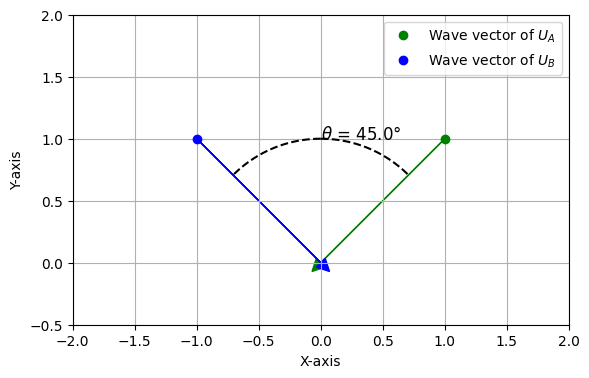

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the points
point1 = (1, 1)
point2 = (-1, 1)
origin = (0, 0)

# Create the plot
fig, ax = plt.subplots()

# Plot the points
ax.plot(*point1, 'go', label="Wave vector of $U_A$")
ax.plot(*point2, 'bo', label="Wave vector of $U_B$")

# Draw arrows from points to the origin
ax.arrow(point1[0], point1[1], -point1[0], -point1[1], head_width=0.1, head_length=0.1, color='g')
ax.arrow(point2[0], point2[1], -point2[0], -point2[1], head_width=0.1, head_length=0.1, color='b')

# Calculate the angle with respect to the y-axis and plot it
angle = np.degrees(np.arctan2(1, 1))  # angle between point1 and the y-axis
ax.annotate(r'$\theta$ = {:.1f}°'.format(angle), xy=(0, 1), fontsize=12, color='black')

# Draw angle arcs for visual clarity
theta = np.linspace(0, np.arctan2(1, 1), 100)
ax.plot(np.sin(theta), np.cos(theta), color="black", linestyle="--")
ax.plot(np.sin(-theta), np.cos(theta), color="black", linestyle="--")
ax.plot(np.sin(45),np.cos(45), color="black")


# Set plot limits and labels
ax.set_xlim(-2, 2)
ax.set_ylim(-0.5, 2)
ax.set_aspect('equal')
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.legend()
ax.grid(True)
plt.show()



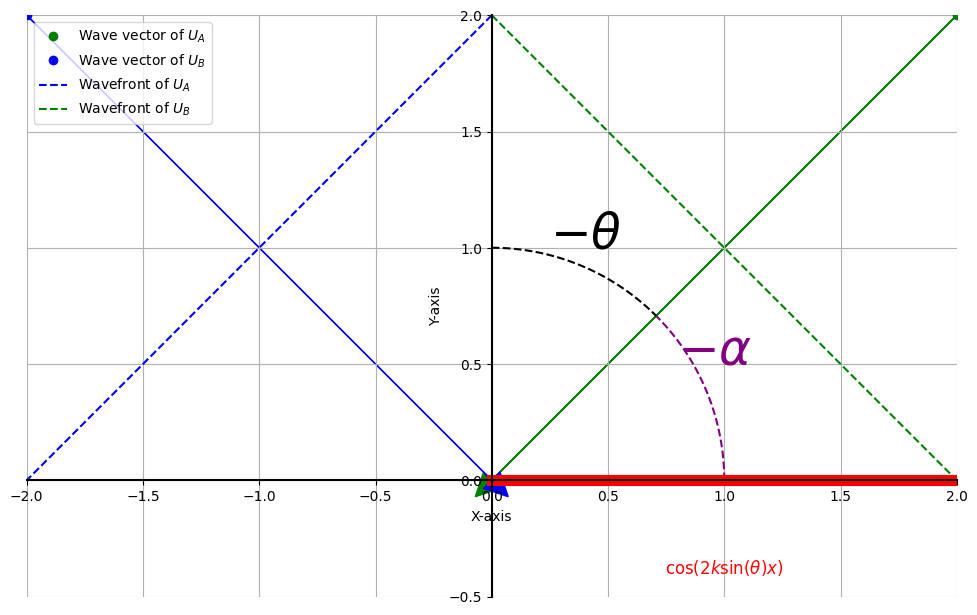

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the points
point1 = (2, 2)
point2 = (-2, 2)
origin = (0, 0)

# Create the plot with specified figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the points
ax.plot(*point1, 'go', label="Wave vector of $U_A$")
ax.plot(*point2, 'bo', label="Wave vector of $U_B$")

# Draw arrows from points to the origin
ax.arrow(point1[0], point1[1], -point1[0], -point1[1], head_width=0.1, head_length=0.1, color='g')
ax.arrow(point2[0], point2[1], -point2[0], -point2[1], head_width=0.1, head_length=0.1, color='b')

# Calculate the angle with respect to the y-axis and plot it
angle = np.degrees(np.arctan2(1, 1))  # angle between point1 and the y-axis
ax.annotate(r'$-\theta$'.format(angle), xy=(0.25, 1), fontsize=35, color='black')

# Draw angle arcs for visual clarity
theta = np.linspace(0, np.arctan2(-0.5, 0.5), 100)
ax.plot(np.sin(-theta), np.cos(theta), color="black", linestyle="--")


# Define the angle between (0.5, 0.5) and the x-axis
angle2 = np.degrees(np.arctan2(1, 1))
ax.annotate(r'$-\alpha$'.format(angle2), xy=(0.8, 0.5), fontsize=35, color='purple')

# Draw angle arc for visual clarity
phi = np.linspace(0, np.arctan2(1, 1), 100)
ax.plot(np.cos(phi),np.sin(phi), color="purple", linestyle="--")


# New lines from (0, 1) to (-1, 0) and (1, 0)
ax.plot([0, -2], [2, 0], color="blue", linestyle="--", label="Wavefront of $U_A$")
ax.plot([0, 2], [2, 0], color="green", linestyle="--", label="Wavefront of $U_B$")

# Draw the red line from (0, 0) to (2, 0) with a thicker width
ax.plot([0, 2], [0, 0], color="red", linewidth=8)

# Add the label below the line
ax.text(1, -0.4, r'$\cos(2k \sin(\theta) x)$', color="red", ha='center', fontsize=12)


# Set plot limits and labels
ax.set_xlim(-2, 2)
ax.set_ylim(-0.5, 2)
ax.set_aspect('equal')
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# Move x-axis and y-axis to the center
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Set color for x-axis
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

# Hide top and right spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Display legend and grid
ax.legend(loc="upper left")
ax.grid(True)
plt.show()


[]

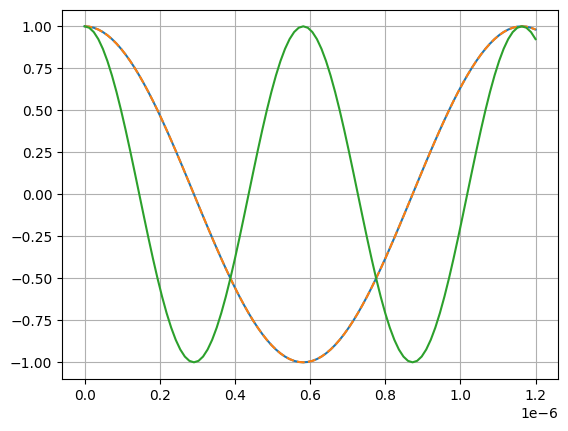

In [3]:
import numpy as np

wavelength = 633e-9  # Wavelength in meters
U_0 = 1  # Amplitude

theta = 10

def wave_A(U_0, wavelength, x):
    return np.real(U_0 * np.exp(1j * (-2 * np.pi / wavelength) * x*np.sin(theta)))

def wave_B(U_0, wavelength, x):
    return np.real(U_0 * np.exp(1j * (2 * np.pi / wavelength) * x*np.sin(-theta)))

def wave_interferenced(U_0, wavelength, x):
    return np.real(U_0 * np.exp(-2*1j * (2 * np.pi / wavelength) * x*np.sin(theta)))
# Example usage:

x_values = np.linspace(0, 1.2e-6, 100)  # Generate an array of x values from 0 to 1 micrometer

plt.grid()
plt.plot(x_values,wave_A(U_0, wavelength, x_values))
plt.plot(x_values,wave_B(U_0, wavelength, x_values),ls="--")
plt.plot(x_values,wave_interferenced(U_0, wavelength, x_values))
plt.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


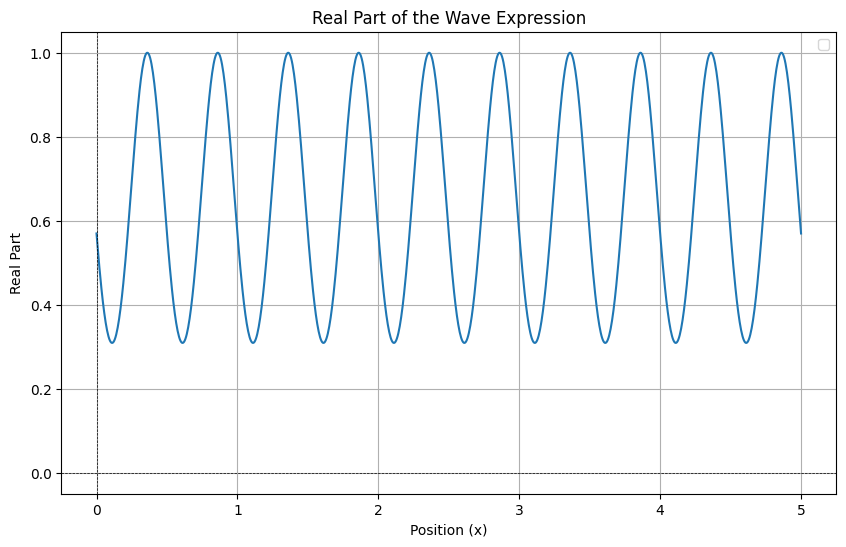

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 1.5  # You can change this value to see how it affects the plot
s = 0.8
Lambda = 1  # Wavelength in meters (can adjust as needed)

m = 2 * np.pi *(n-1)*s/Lambda
k = np.pi*2/633e-9
# x values
x = np.linspace(0, 5 * Lambda, 1000)  # Generate x values from 0 to 5*Lambda
# Calculate the real part of the expression
real_part = np.cos((m / 2) * np.sin(2 * np.pi * (x+k) / Lambda))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, real_part)
plt.title('Real Part of the Wave Expression')
plt.xlabel('Position (x)')
plt.ylabel('Real Part')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()


1.988628149722339


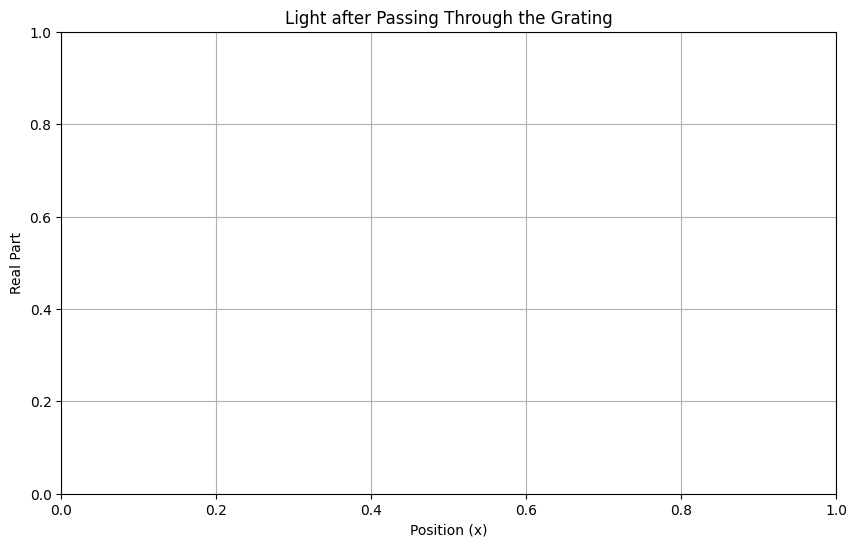

array([0.00000000e+00, 1.00010001e-08, 2.00020002e-08, ...,
       9.99799980e-05, 9.99899990e-05, 1.00000000e-04])

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
U_0 = 1  # Amplitude
omega = 1  # Angular frequency (can be adjusted)
wavelength = 633e-9 
k = 2 * np.pi / wavelength  # Wave number for 633 nm wavelength
theta = np.radians(19.106029214617076)  # Angle in radians
Lambda = 1e-6  # Grating period in meters
n = 1.5
s = 633e-9 / (2*(n-1))
m = 2 * np.pi *(n-1)*s/Lambda
print(m)

def U_post(x,z,displacment):
    U_x = U_0*np.exp(1j * (m / 2) * np.sin(2 * np.pi * (x+displacment) / Lambda)-2j * k * np.sin(theta)*x)
    U_z = np.exp(2j*np.pi/wavelength*np.cos(theta)*z)
    return U_x*U_z

# x values
x = np.linspace(0,100*Lambda, 10000) 

# Calculate U_Post-Gratting
displacment = 0
z=0
U_post_grating = U_post(x,z,displacment)

# Plot the real part of U_Post-Gratting
plt.figure(figsize=(10, 6))
plt.title('Light after Passing Through the Grating')
plt.xlabel('Position (x)')
plt.ylabel('Real Part')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.show()
x

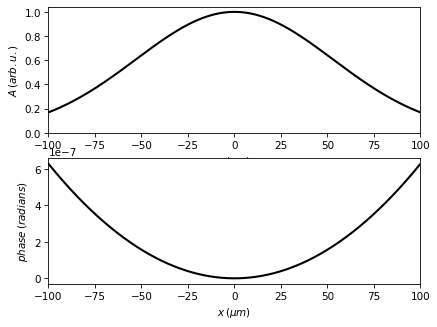

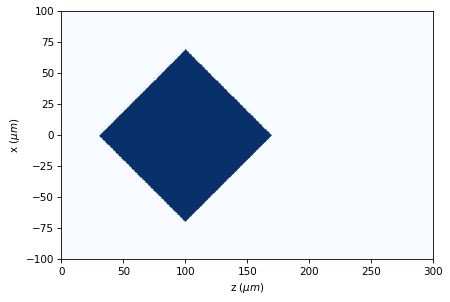

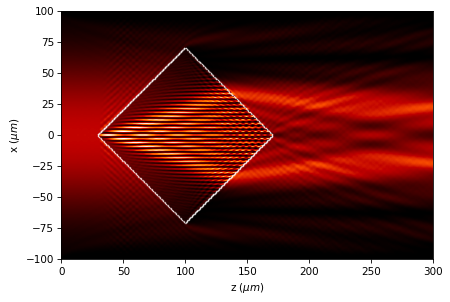

In [12]:
from diffractio import um, nm, mm, np,degrees
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 300 * um, 512)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=75 * um, theta=0 * degrees)
u0.draw(kind='field', filename='usage4.png')

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.rectangle(r0=(0 * um, 100 * um),
  size=(100 * um, 100 * um),
  angle=45 * degrees,
  refraction_index=2)

u1.draw_refraction_index(filename='usage5.png', scale='scaled')
u1.WPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, filename='usage6.png', scale='scaled');

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift

# Define parameters
wavelength = 0.633e-6  # Wavelength in meters (633 nm for He-Ne laser)
k = 2 * np.pi / wavelength  # Wavenumber
z = 0.1  # Propagation distance in meters
size = 10e-3  # Size of the grid in meters (10 mm)
num_points = 512  # Resolution of the grid

# Spatial grid
x = np.linspace(-size / 2, size / 2, num_points)
y = np.linspace(-size / 2, size / 2, num_points)
X, Y = np.meshgrid(x, y)
dx = x[1] - x[0]  # Sampling interval

# Define the initial wavefront (U) here
# Example: Gaussian beam profile
w0 = 0.5e-3  # Beam waist in meters (0.5 mm)
U = np.exp(-((X**2 + Y**2) / (w0**2)))  # Gaussian beam

# Fourier transform of the initial field
U_f = fftshift(fft2(U))

# Frequency grid
fx = np.fft.fftfreq(num_points, d=dx)
fy = np.fft.fftfreq(num_points, d=dx)
FX, FY = np.meshgrid(fx, fy)

# Transfer function for free-space propagation
H = np.exp(1j * k * z * np.sqrt(1 - (wavelength * FX)**2 - (wavelength * FY)**2))

# Apply the transfer function in the frequency domain
U_z_f = U_f * H

# Inverse Fourier transform to get the propagated field
U_z = ifft2(fftshift(U_z_f))

# Plot the intensity of the propagated field
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(U_z)**2, extent=(-size/2*1e3, size/2*1e3, -size/2*1e3, size/2*1e3), cmap="inferno")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar(label="Intensity")
plt.title("Propagated Field Intensity at z = {} m".format(z))
plt.show()

KeyboardInterrupt: 